# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy import stats
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as shc

Importing Wholesale Dataset

In [4]:
wholesale_data = 'wholesale_data.csv'

In [5]:
db_wholesale = pd.read_csv(wholesale_data)
db_wholesale.shape

(440, 8)

In [6]:
db_wholesale.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


Exploratory Data Analysis

In [7]:
#Missing values
missing_values = db_wholesale.isnull().sum()
print(missing_values)

#No Missing Values

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [8]:
#Summary Statistics
Stats = db_wholesale.describe()
Stats

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


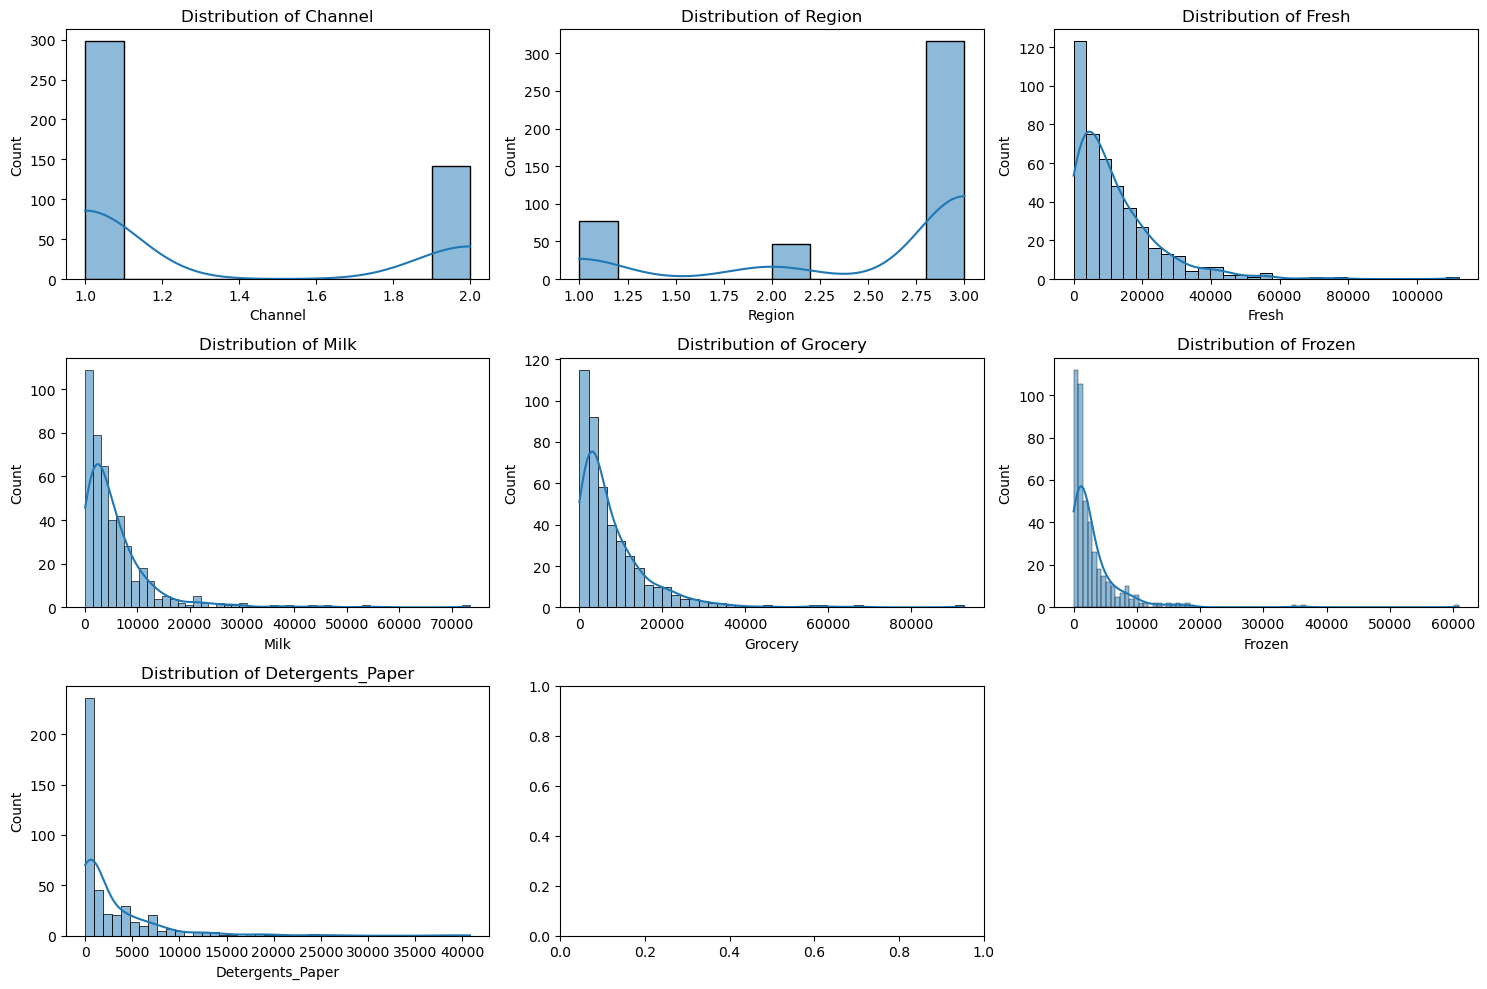

In [9]:
#Histograms to understand the distribution of each  variable
predictor_count = len(db_wholesale.columns)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

for i, column in enumerate(db_wholesale.columns[:-1]):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    
    sns.histplot(data=db_wholesale, x=column, kde=True, ax=ax)
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    
for i in range(predictor_count, 9):
    row = i // 3
    col = i % 3
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

C:\Users\paula\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


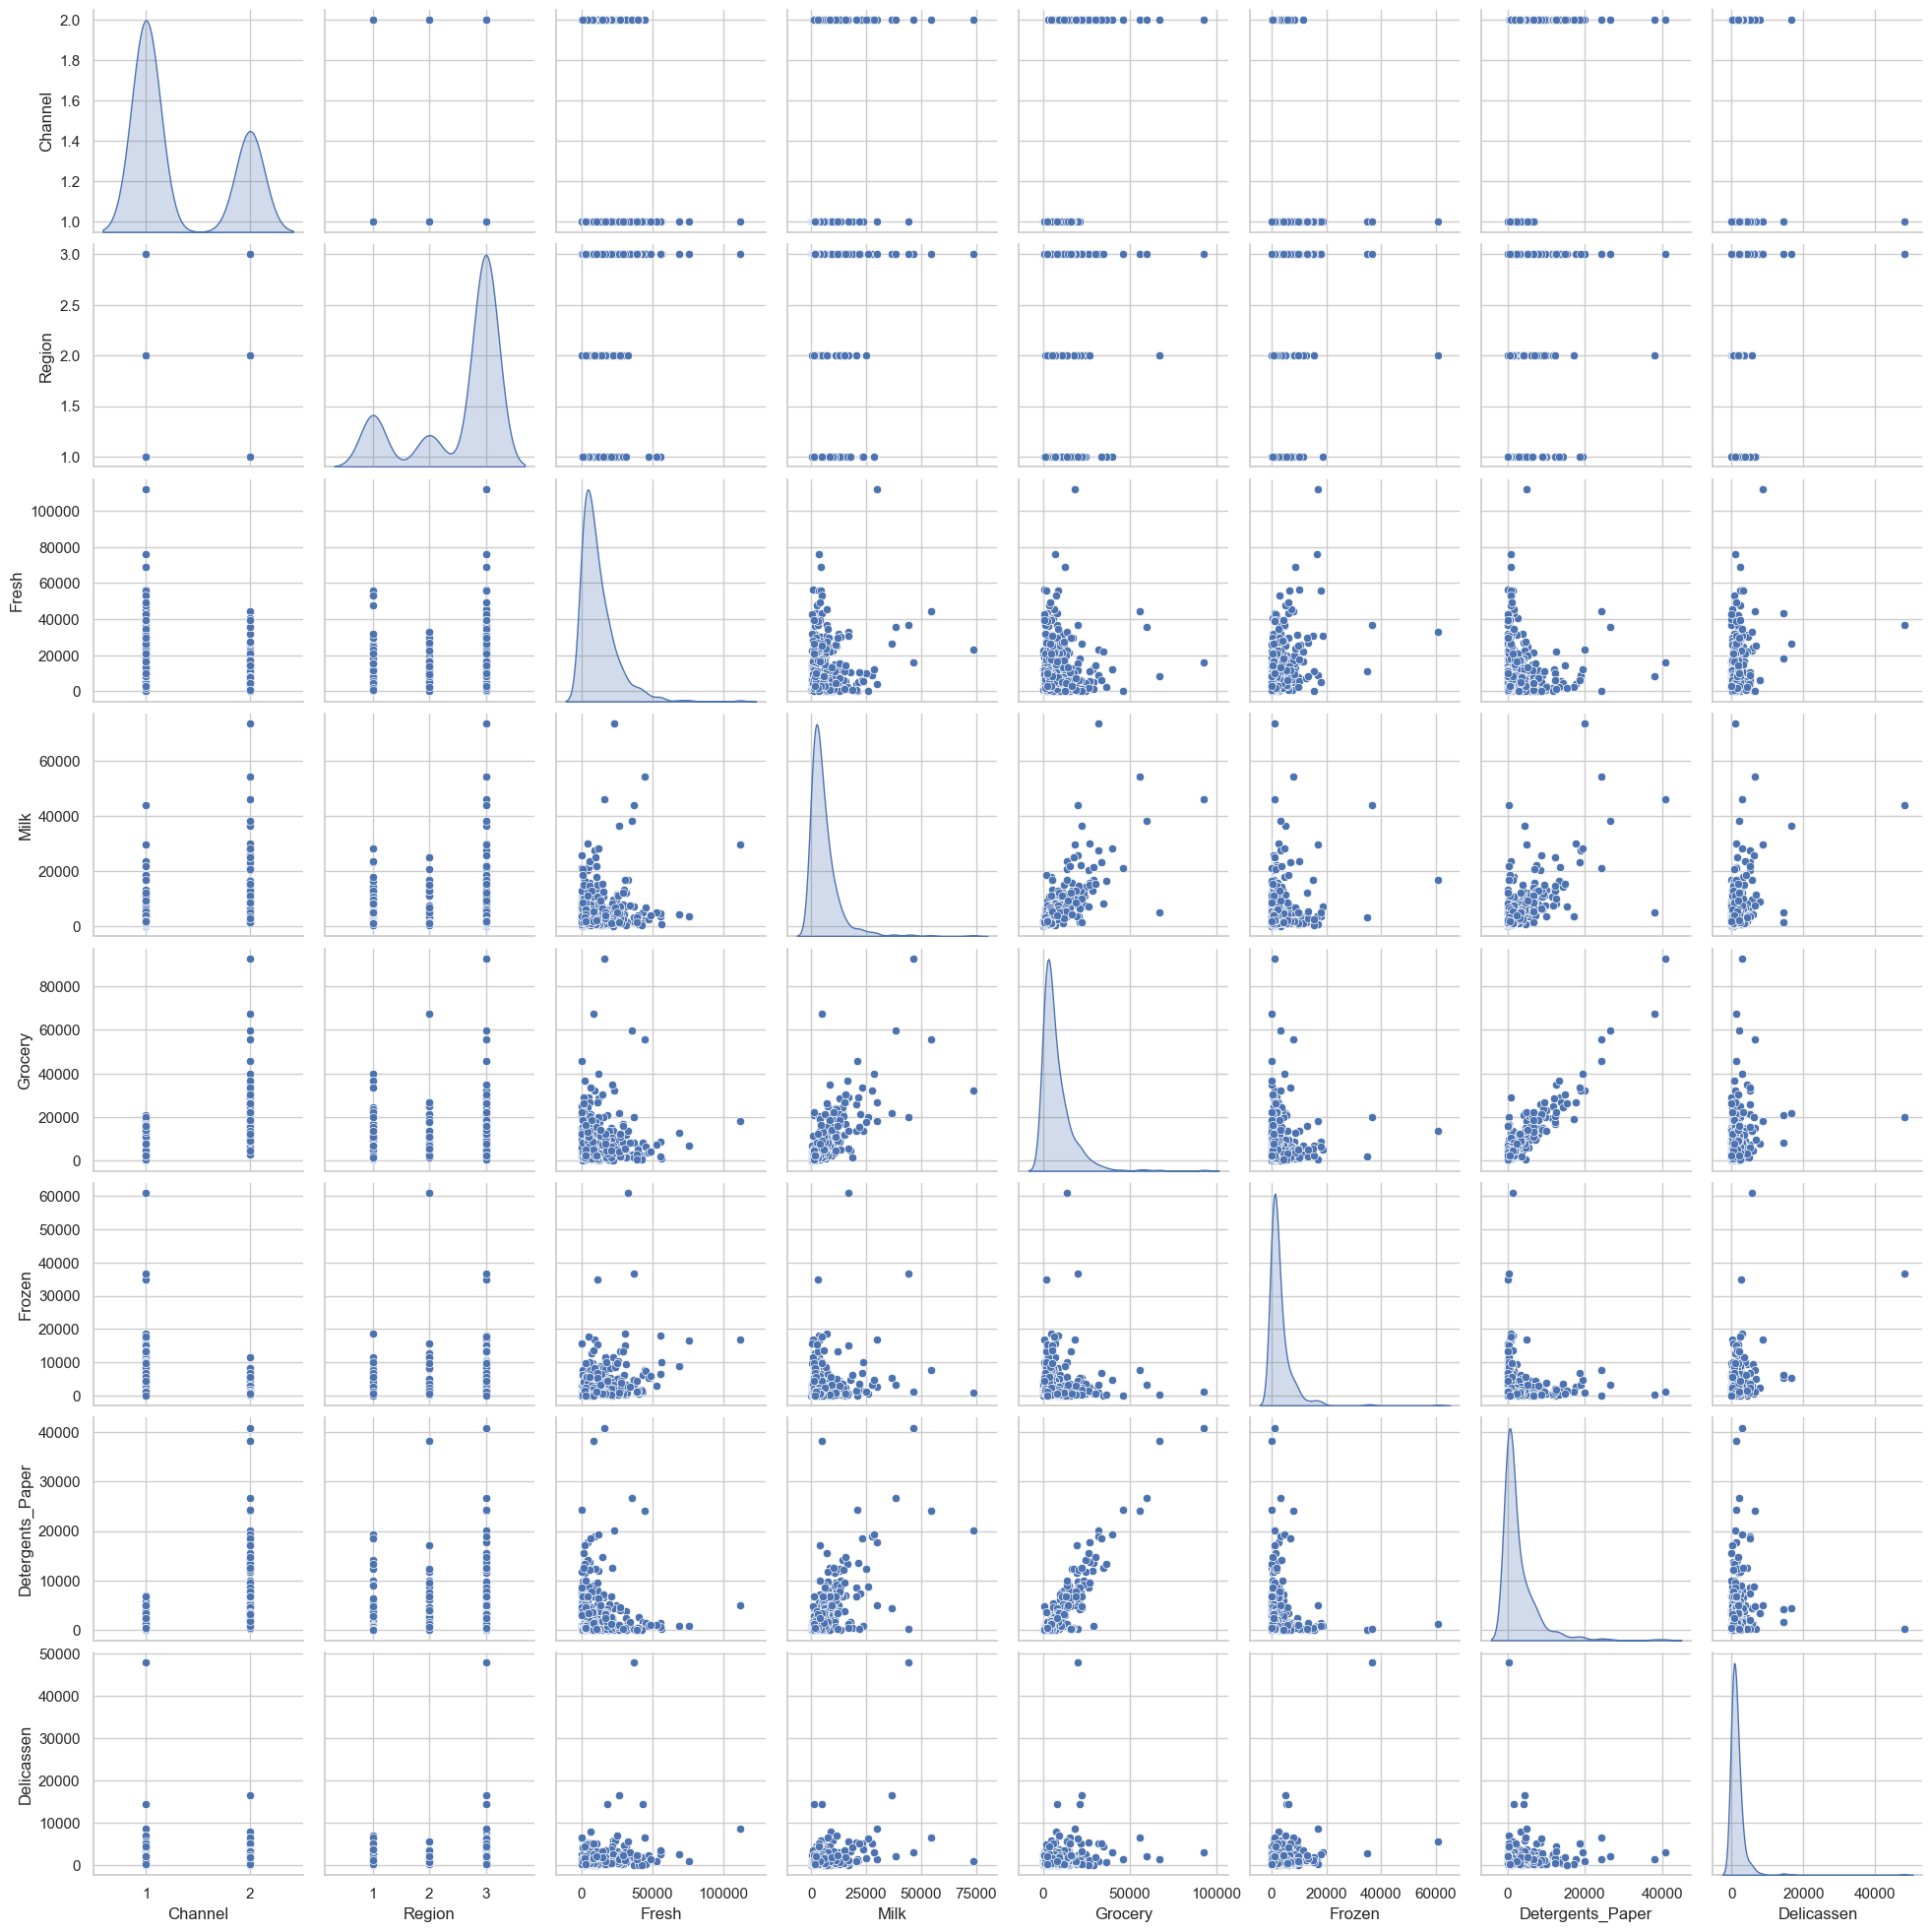

In [10]:
#Scatter plots to show the relationship and trends between the variables
sns.set(style='whitegrid')
sns.pairplot(db_wholesale, diag_kind='kde')
plt.show()

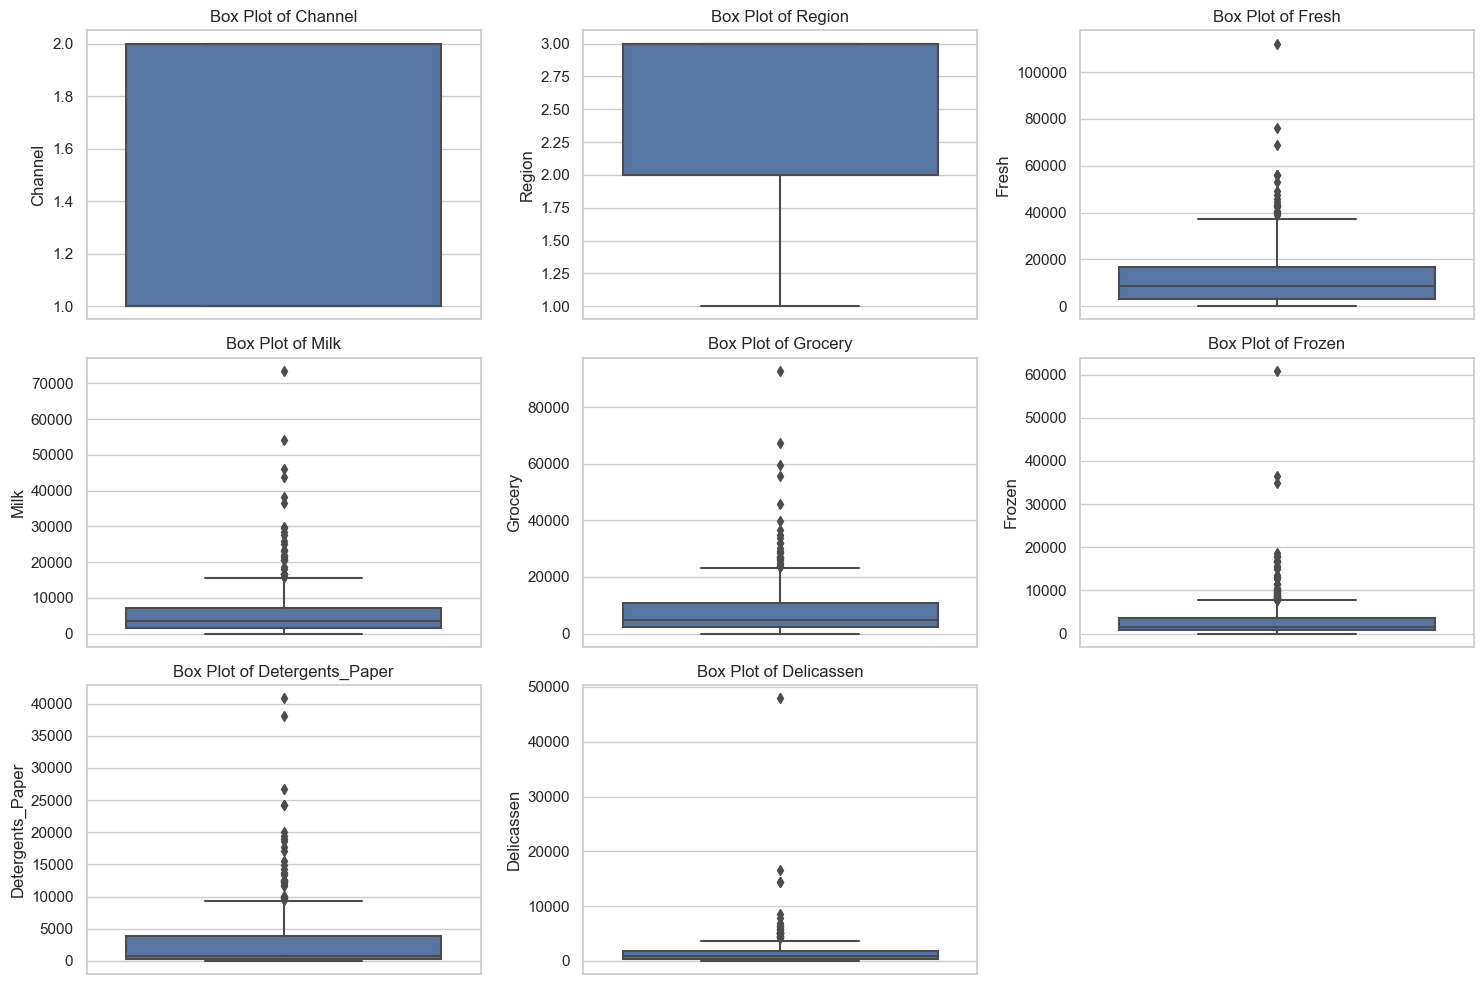

In [11]:
#Box plots to understand if there are any outliers in the variables
plt.figure(figsize=(15, 10))
for i, column in enumerate(db_wholesale.columns):
    plt.subplot(3, 3, i + 1)
    
    sns.boxplot(y=column, data=db_wholesale)
    plt.title(f'Box Plot of {column}')
    #plt.xlabel('Outcome')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

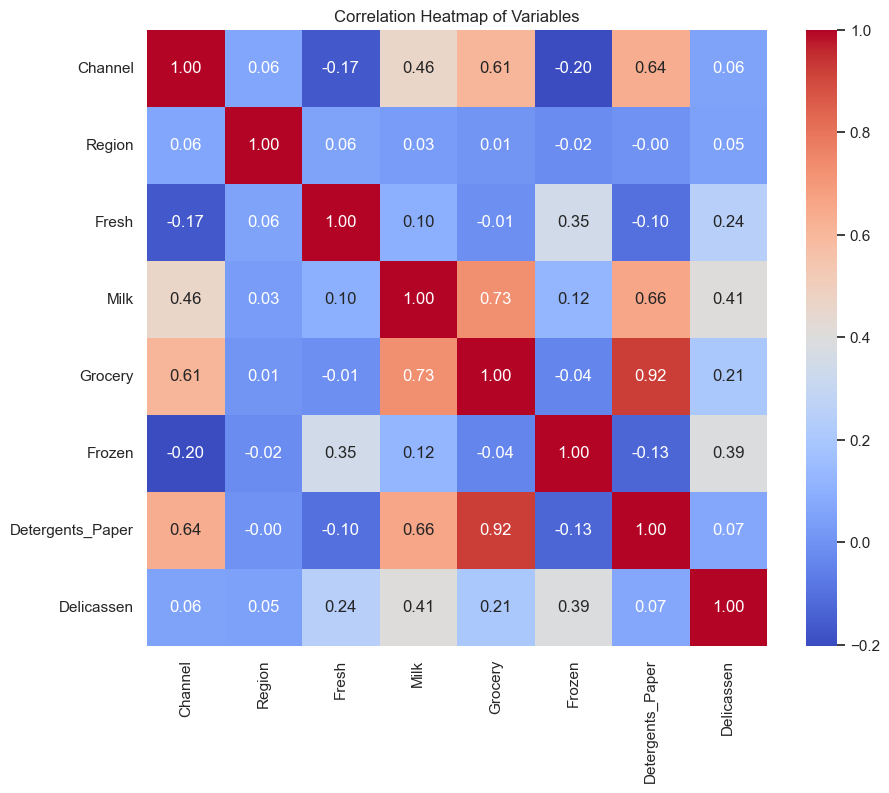

In [12]:
#Heat map to to understand the correlation between the variables

correlation = db_wholesale.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Variables')
plt.show()

In [13]:
#Handling Outliers

z_score = stats.zscore(db_wholesale)
threshold = 3
outlier = (abs(z_score) > threshold).any(axis=1)
no_outliers = db_wholesale[~outlier]
no_outliers

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [14]:
#Applying log transformation to account for the data distribution
transform = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'] 

# Apply the log transformation to the specified columns
transformed = np.log(no_outliers[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']])


In [15]:
transformed

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525
...,...,...,...,...,...,...
435,10.299003,9.396903,9.682030,9.483036,5.204007,7.698029
436,10.577146,7.266129,6.638568,8.414052,4.532599,7.760467
437,9.584040,9.647821,10.317020,6.079933,9.605149,7.532088
438,9.238928,7.591357,7.710653,6.945051,5.123964,7.661527


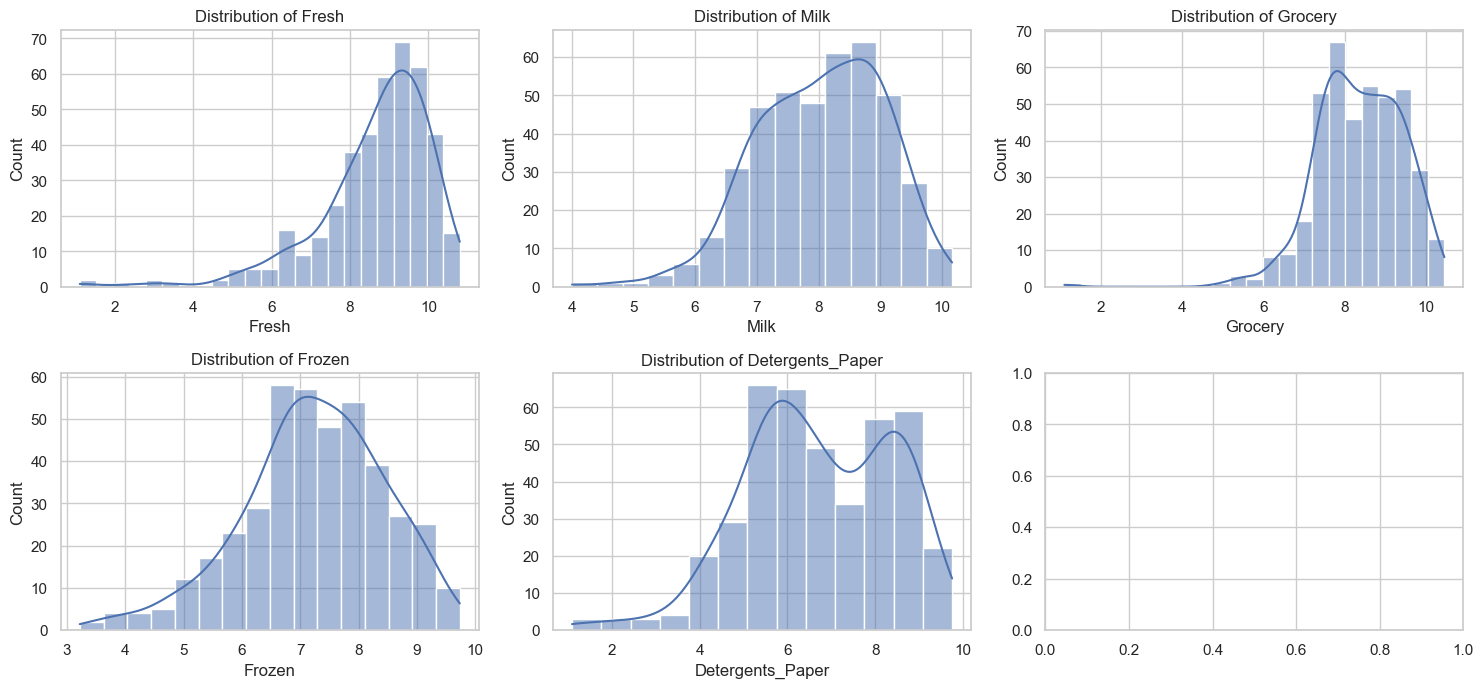

In [16]:
#Histograms to validate the variables distribution
predictor_count = len(transformed.columns)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

for i, column in enumerate(transformed.columns[:-1]):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    
    sns.histplot(data=transformed, x=column, kde=True, ax=ax)
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    
for i in range(predictor_count, 9):
    row = i // 3
    col = i % 3
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

In [17]:
#Standardizing the dataset to a mean of 0 and a variance of 1

scaler = StandardScaler()
wholesale_std = scaler.fit_transform(transformed)
wholesale_std

array([[ 0.53994554,  1.1060512 ,  0.53177271, -1.53476012,  0.71202964,
         0.49003858],
       [ 0.13731037,  1.12153304,  0.75252163,  0.20141667,  0.83633339,
         0.71253761],
       [ 0.06499565,  1.01611275,  0.54690382,  0.45761526,  0.87545001,
         1.87959681],
       ...,
       [ 0.63430249,  1.56835628,  1.83163986, -0.94679932,  1.73513218,
         0.75179816],
       [ 0.39683011, -0.44379554, -0.61229368, -0.23435408, -0.9400126 ,
         0.85349764],
       [-0.50197456, -0.59462463, -0.50222458, -2.51606193, -0.31704031,
        -2.06165199]])

In [18]:
df_wholesale_std = pd.DataFrame(wholesale_std)
df_wholesale_std.columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
df_wholesale_std

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.539946,1.106051,0.531773,-1.534760,0.712030,0.490039
1,0.137310,1.121533,0.752522,0.201417,0.836333,0.712538
2,0.064996,1.016113,0.546904,0.457615,0.875450,1.879597
3,0.571578,-0.937541,-0.014829,1.264152,-0.280628,0.717829
4,0.938670,0.539204,0.485639,0.858890,0.468077,1.554336
...,...,...,...,...,...,...
409,1.126271,1.322845,1.236224,1.855737,-0.892229,0.882177
410,1.317662,-0.762016,-1.617565,0.975404,-1.293041,0.931234
411,0.634302,1.568356,1.831640,-0.946799,1.735132,0.751798
412,0.396830,-0.443796,-0.612294,-0.234354,-0.940013,0.853498


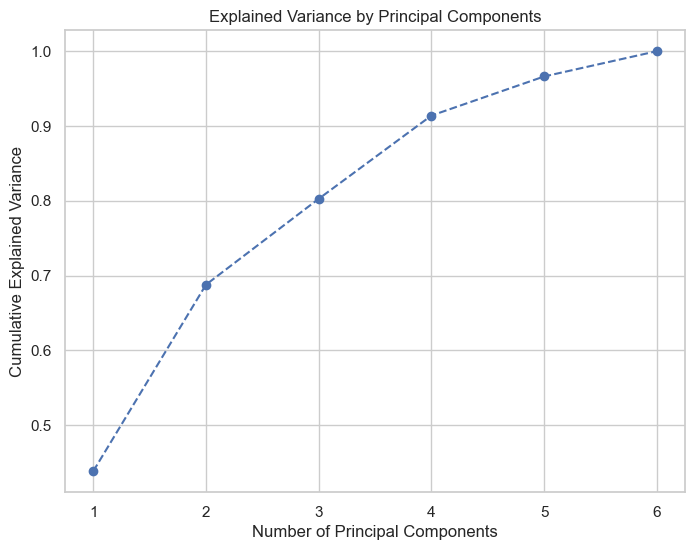

In [19]:
#Identifying the important variables

pca = PCA()
pca.fit(df_wholesale_std)

explained_variance = pca.explained_variance_ratio_

cumulative_variance = explained_variance.cumsum()

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

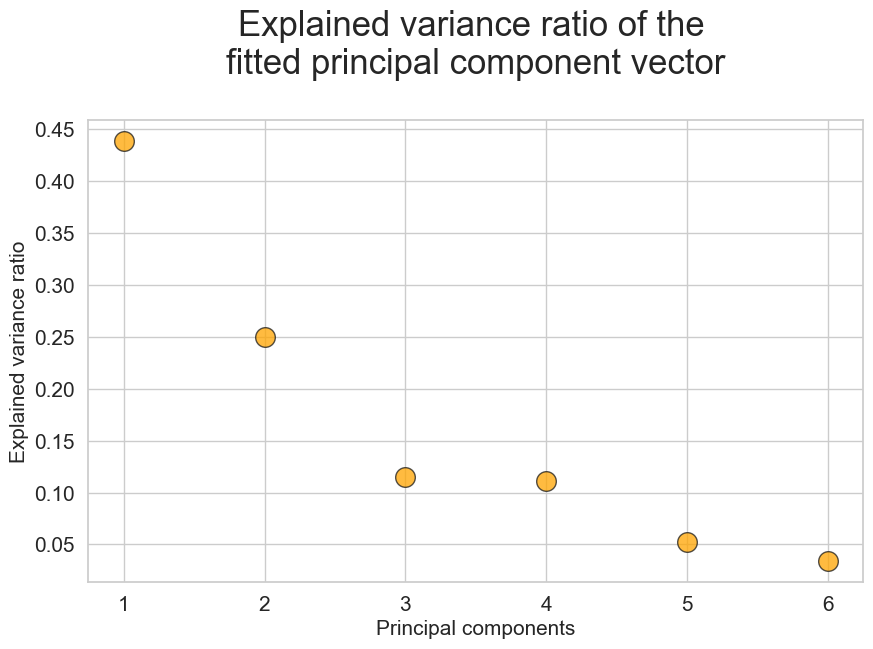

In [20]:
pca = PCA(n_components=None)
dfx_pca = pca.fit(df_wholesale_std)

plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],
            y=dfx_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

C:\Users\paula\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\paula\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\paula\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\paula\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

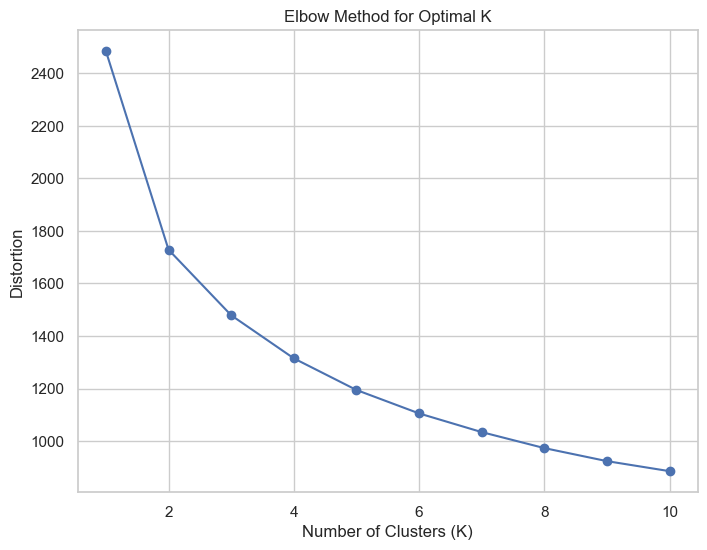

In [21]:
#Finding out the Optimal number of Clusters

distortions = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_wholesale_std)
    distortions.append(kmeans.inertia_)

#Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(K_range, distortions, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Distortion')
plt.grid(True)
plt.show()


In [24]:
optimal_k = 7 
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
kmeans.fit(df_wholesale_std)

cluster_labels = kmeans.labels_

df_wholesale_std['Cluster'] = cluster_labels

C:\Users\paula\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\paula\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [25]:
df_wholesale_std

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,0.539946,1.106051,0.531773,-1.534760,0.712030,0.490039,2
1,0.137310,1.121533,0.752522,0.201417,0.836333,0.712538,2
2,0.064996,1.016113,0.546904,0.457615,0.875450,1.879597,2
3,0.571578,-0.937541,-0.014829,1.264152,-0.280628,0.717829,0
4,0.938670,0.539204,0.485639,0.858890,0.468077,1.554336,2
...,...,...,...,...,...,...,...
409,1.126271,1.322845,1.236224,1.855737,-0.892229,0.882177,2
410,1.317662,-0.762016,-1.617565,0.975404,-1.293041,0.931234,0
411,0.634302,1.568356,1.831640,-0.946799,1.735132,0.751798,2
412,0.396830,-0.443796,-0.612294,-0.234354,-0.940013,0.853498,5


In [26]:
cluster_stats = df_wholesale_std.groupby('Cluster').describe()
cluster_stats

Fresh                                                              \
         count      mean       std       min       25%       50%       75%   
Cluster                                                                      
0        102.0  0.565188  0.534859 -1.436174  0.287485  0.712837  0.913270   
1         25.0 -0.139888  0.673213 -1.525184 -0.565561 -0.069641  0.433294   
2         89.0  0.298774  0.552039 -1.397003 -0.104354  0.334289  0.744831   
3         43.0 -1.234691  0.900853 -3.971630 -1.783979 -1.158774 -0.624778   
4         11.0 -3.198194  1.322866 -5.204544 -4.125773 -2.812631 -2.163212   
5         97.0  0.086130  0.701072 -2.068598 -0.372089  0.203452  0.576489   
6         47.0 -0.017566  0.791638 -1.832617 -0.395634  0.120232  0.492258   

                    Milk            ... Detergents_Paper           Delicassen  \
              max  count      mean  ...              75%       max      count   
Cluster                             ...                                         
0        1.471600  102.0 -0.357342  ...        -0.108354  0.888383      102.0   
1        1.278096   25.0  0.607668  ...         1.122237  1.820412       25.0   
2        1.343365   89.0  0.972081  ...         1.260992  1.735132       89.0   
3        0.920918   43.0  0.896867  ...         1.342951  1.639207       43.0   
4       -1.578535   11.0 -0.743066  ...         0.820974  1.264541       11.0   
5        1.382243   97.0 -0.190059  ...         0.073786  0.807932       97.0   
6        1.377403   47.0 -1.642847  ...        -0.605068  1.056538       47.0   

                                                                               
             mean       std       min       25%       50%       75%       max  
Cluster                                                                        
0        0.229953  0.627846 -1.898511 -0.091564  0.301826  0.669522  1.651025  
1       -1.909116  1.123112 -4.302949 -2.157980 -1.805969 -1.090422 -0.682077  
2        0.683875  0.535228 -0.577162  0.346790  0.698252  1.068544  1.879597  
3        0.332613  0.742913 -1.198478 -0.034626  0.445958  0.864512  1.716302  
4       -1.797277  1.343920 -4.302949 -2.735887 -1.472981 -0.869660 -0.008937  
5        0.059740  0.590444 -1.353909 -0.371375 -0.005619  0.513183  1.498449  
6       -0.785518  0.887381 -3.532317 -1.084049 -0.581744 -0.230412  0.892448  

[7 rows x 48 columns]

In [27]:
cluster_Transposed = cluster_stats.T
cluster_Transposed

Cluster                          0          1          2          3  \
Fresh            count  102.000000  25.000000  89.000000  43.000000   
                 mean     0.565188  -0.139888   0.298774  -1.234691   
                 std      0.534859   0.673213   0.552039   0.900853   
                 min     -1.436174  -1.525184  -1.397003  -3.971630   
                 25%      0.287485  -0.565561  -0.104354  -1.783979   
                 50%      0.712837  -0.069641   0.334289  -1.158774   
                 75%      0.913270   0.433294   0.744831  -0.624778   
                 max      1.471600   1.278096   1.343365   0.920918   
Milk             count  102.000000  25.000000  89.000000  43.000000   
                 mean    -0.357342   0.607668   0.972081   0.896867   
                 std      0.596641   0.554634   0.481655   0.444912   
                 min     -1.520713  -0.594625  -0.016754  -0.176993   
                 25%     -0.806607   0.177210   0.673829   0.577686   
                 50%     -0.454084   0.786268   0.917186   0.902824   
                 75%      0.118238   0.922212   1.317961   1.139162   
                 max      1.641314   1.643774   2.039624   2.070018   
Grocery          count  102.000000  25.000000  89.000000  43.000000   
                 mean    -0.400205   0.762891   0.877935   1.071630   
                 std      0.508520   0.587509   0.495315   0.356221   
                 min     -1.855148  -0.502225  -0.889922   0.302829   
                 25%     -0.721918   0.535980   0.546049   0.872850   
                 50%     -0.468476   0.776803   0.867570   1.056176   
                 75%     -0.009683   1.097909   1.207350   1.326120   
                 max      0.664747   1.791834   1.831640   1.963030   
Frozen           count  102.000000  25.000000  89.000000  43.000000   
                 mean     1.039781  -0.611491   0.149960  -1.123615   
                 std      0.459141   1.036477   0.633810   0.942875   
                 min     -0.009428  -2.516062  -1.534760  -3.302948   
                 25%      0.659174  -1.566136  -0.212434  -1.478978   
                 50%      1.011116  -0.462324   0.156761  -1.044739   
                 75%      1.434771   0.223096   0.570402  -0.420017   
                 max      1.983963   1.246606   1.855737   0.392069   
Detergents_Paper count  102.000000  25.000000  89.000000  43.000000   
                 mean    -0.434410   0.670334   0.887532   1.198348   
                 std      0.499291   0.872358   0.538052   0.238033   
                 min     -2.009644  -2.210509  -0.892229   0.673055   
                 25%     -0.755757   0.017928   0.644000   1.018201   
                 50%     -0.435755   0.927606   0.953038   1.259833   
                 75%     -0.108354   1.122237   1.260992   1.342951   
                 max      0.888383   1.820412   1.735132   1.639207   
Delicassen       count  102.000000  25.000000  89.000000  43.000000   
                 mean     0.229953  -1.909116   0.683875   0.332613   
                 std      0.627846   1.123112   0.535228   0.742913   
                 min     -1.898511  -4.302949  -0.577162  -1.198478   
                 25%     -0.091564  -2.157980   0.346790  -0.034626   
                 50%      0.301826  -1.805969   0.698252   0.445958   
                 75%      0.669522  -1.090422   1.068544   0.864512   
                 max      1.651025  -0.682077   1.879597   1.716302   

Cluster                         4          5          6  
Fresh            count  11.000000  97.000000  47.000000  
                 mean   -3.198194   0.086130  -0.017566  
                 std     1.322866   0.701072   0.791638  
                 min    -5.204544  -2.068598  -1.832617  
                 25%    -4.125773  -0.372089  -0.395634  
                 50%    -2.812631   0.203452   0.120232  
                 75%    -2.163212   0.576489   0.492258  
                 max    -1.578535   1.382243   1.377403 

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

TypeError: Linkage matrix 'Z' must contain doubles.

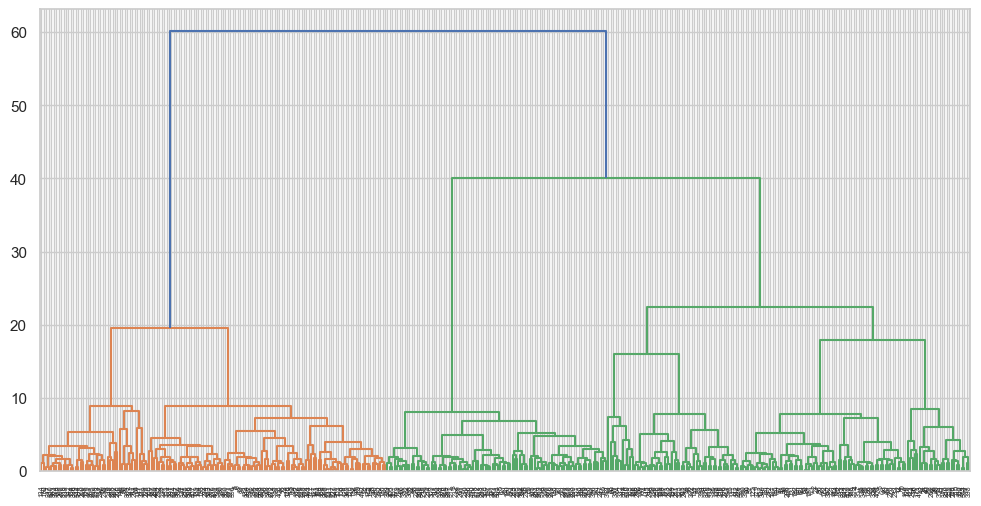

In [28]:
# Perform hierarchical clustering
linkage_matrix = linkage(df_wholesale_std, method='ward')  # You can choose a different linkage method

# Create a dendrogram
plt.figure(figsize=(12, 6))
dendrogram(dendrogram(linkage_matrix, p=10, truncate_mode='level'))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

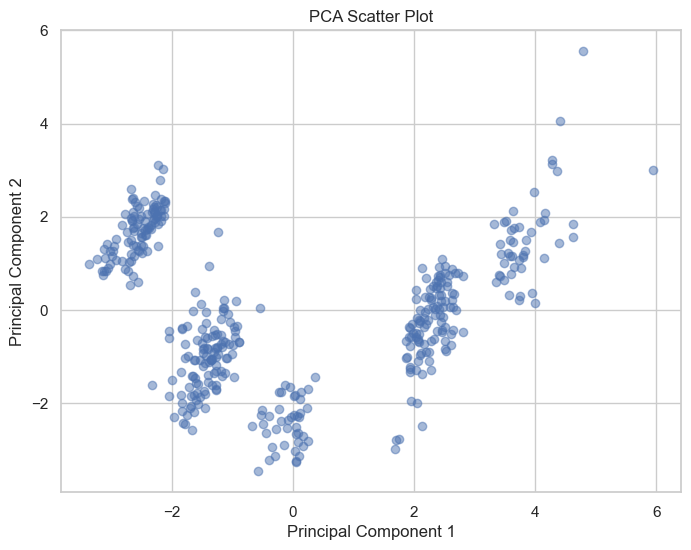

In [30]:
#3diamensional scatter plot using PCA
n_components = 3 
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(df_wholesale_std)

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='b', marker='o', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot')
plt.grid(True)
plt.show()

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

From the dataset provided, we can come to the following conclusions:

1. Our data does not have missing values but we do have outliers. About 26 rows have been removed to help manage outliers.
2. None of the columns in the dataset is normally distributed hence log transformation was applied to create a normal distribution for modelling.
3. There is very little noise in the dataset as most of the columns provides insights. Hence no column was dropped. (Outside of Region and Channel).
4. We observed 7 optimal clusters from the dataset and provided desciptive statistics from each cluster to help understand cluster characteristics.